In [4]:
import rasterio as rio
# import geowombat as gw
from rasterio.plot import plotting_extent
# from glob import glob
import numpy as np
# import earthpy as et
# import earthpy.spatial as es
# import earthpy.plot as ep
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [5]:
bands = ["B4", "B3", "B2"]

In [9]:
# Read data

# Pipe network and leak loc
tuberias = gpd.read_file('../data/shp/Tuberias.shp')
leaks = pd.read_excel('../data/raw/Ordenes Fugas Ejecutadas Dic2022 XY.xlsx')

# Satellite images
images_path = "../data/images/*.tif"
sat_band_path = glob(images_path)
sat_band_path.sort()

# Stack RGB bands
sat_stack, meta = es.stack(sat_band_path, out_path = "../data/stacked.tif")

In [10]:
# Define geometry from coords in leaks dataset
leaks["geometry"] = gpd.points_from_xy(leaks["X"], leaks["Y"])

# Create geopandas df
leaks_gdf = gpd.GeoDataFrame(leaks, geometry = gpd.points_from_xy(leaks["X"], leaks["Y"]))

In [40]:
# Reproject boundary (pipes gdf) to match CRS of the Sentinel images
with rio.open(sat_band_path[0]) as raster_crs:
    raster_profile = raster_crs.profile
    bound_utm13N = tuberias.to_crs(raster_profile["crs"])

extent = plotting_extent(sat_stack[0], raster_profile["transform"])

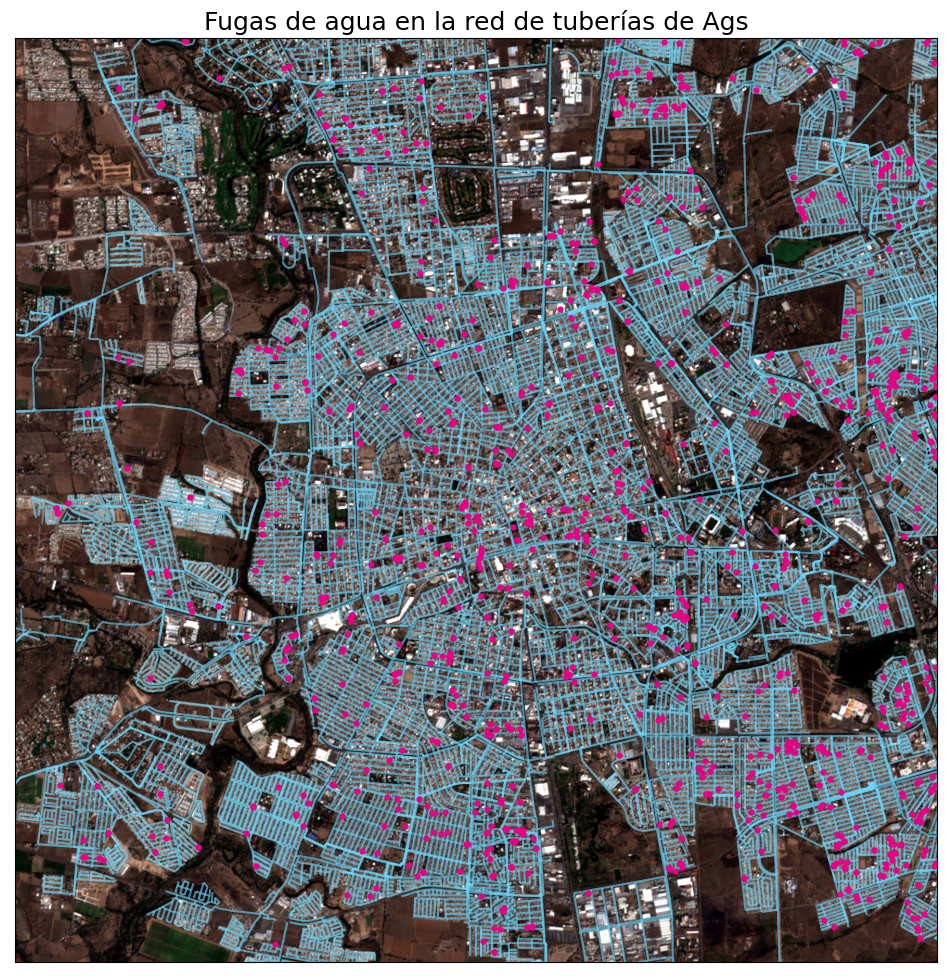

In [41]:
# Create figure with one plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot boundary with high zorder for contrast
tuberias.plot(ax=ax, color="#6FDBFF", alpha = 0.6)
leaks_gdf.plot(ax = ax, color = "#e60083", markersize = 12, zorder = 2)

# Plot CIR image using the raster extent
ep.plot_rgb(
    sat_stack,
    rgb=(2, 1, 0),
    ax=ax,
    extent = extent,
    stretch=True,
    str_clip=0.5,
)
plt.title("Fugas de agua en la red de tuberías de Ags", fontsize = 18)
plt.show()
